(3, 1000)


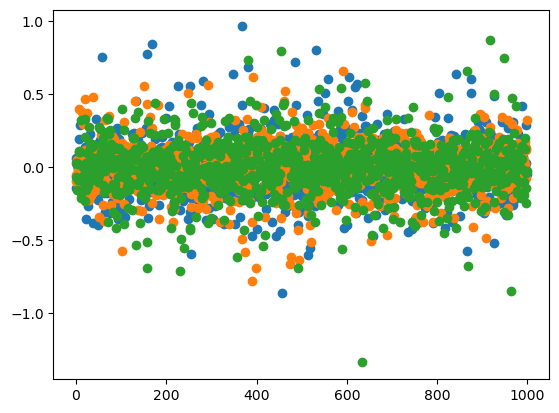

In [23]:
import numpy as np
import matplotlib.pyplot as plt

W_out = np.load("W_out_1-3-3.npy")
print(W_out.shape)
dim_out, num_neurons = W_out.shape
for d in range(dim_out):
    plt.scatter(x=np.arange(stop=num_neurons), y=W_out[d])

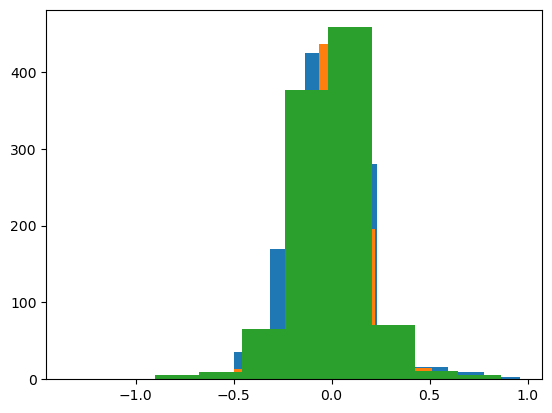

In [24]:
for d in range(dim_out):
    plt.hist(W_out[d])

(2501, 1000)


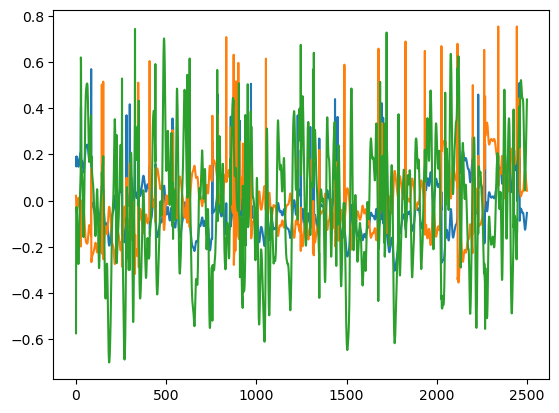

In [26]:
internals = np.load("test_internals_1-3-3.npy")
print(internals.shape)
for n in range(3):
    plt.plot(internals[:, n])

In [29]:
W_out.shape

(3, 1000)

(1000,) 1.4060811429797702 0.019951593557784034
most significant neurons for overall task: [168 867 456 491 917 391 382 157 368 633]
their corresponding weights: [0.87775113 0.88968044 0.8930934  0.90894894 0.91111815 0.91831239
 1.00609212 1.02355728 1.10371322 1.40608114]


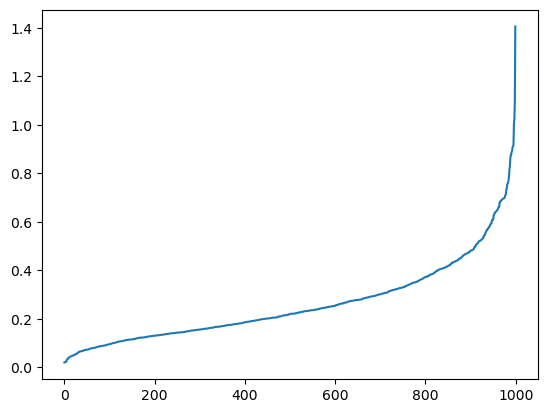

In [27]:
# Find the indices of the neurons with the largest norms, 
# and then compare with neurons with the largest absolute value along each output dimension
norms = np.linalg.norm(W_out, ord=None, axis=0, keepdims=False)
print(norms.shape, max(norms), min(norms)) 
assert len(norms) == 1000 # should compute 1 norm value for all 1000 neurons
if dim_out == 3:
    assert norms[0] == np.sqrt(W_out[0][0]**2 + W_out[1][0]**2 + W_out[2][0]**2)
most_significant_neurons_for_overall_task = np.argsort(norms)[-10:]
print("most significant neurons for overall task:", most_significant_neurons_for_overall_task)
print("their corresponding weights:", norms[most_significant_neurons_for_overall_task])

sorted_norms = norms[np.argsort(norms)]
# plt.scatter(x=np.arange(stop=num_neurons), y=sorted_norms)
plt.plot(sorted_norms)
# start with removing 10 neurons, then 25, 50

In [28]:
# Find the neurons with the largest absolute value along each output dimension
num_significant_neurons = 10
for d in range(dim_out):
    print(f"Output dimension {d} out of {dim_out}")
    W_out_d = W_out[d]
    assert len(W_out_d) == 1000
    print(np.argsort(np.abs(W_out_d))[-num_significant_neurons:])

print(most_significant_neurons_for_overall_task)

Output dimension 0 out of 3
[348 842 382 485  58 157 532 168 456 368]
Output dimension 1 out of 3
[293 102 375 393 476 493 591 474 399 391]
Output dimension 2 out of 3
[869 491 158 230 382 949 454 963 917 633]
[168 867 456 491 917 391 382 157 368 633]


TODO:
* [do now] calculate accuracy of model performance on each output. checked
* [do now] enable neurons to be killed before testing
* [do soon] compare model performance before and after killing significant neurons (to overall task, and to each output dimension task), least significant neurons, and random neurons
* [do soon] vary the number of neurons killed (1, 5, 10, 25, 50, etc)
* [do if we have time] add a noise input channel (combine tasks 1-3-3 with 3-1-1) e.g. 4 or 5 inputs --> 3 outputs
* [do if we have time] perform pca on multi-dimensional W_out matrices to find most/least significant neurons
* [do if we have time] group neurons based on firing patterns using kmean, can also try pca